In [1]:
pwd

'/home/jose/Desktop/Gitlab/mitacs/mitacs_project/02_First_time_passage/Simulations'

In [2]:
import Py_FTP_Langevin as ftp
from ftp_support import *
%matplotlib notebook

Number of processors:  8


In [3]:
fontsize_axis = 20
fontsize_legend = 16
fontsize_ticks = 14

In [4]:
simulations = pd.read_csv('RES_out/spheres_v01/Sphere_without_vdW_regimes_save_all_v01spheres_regimes_all_times.dat',
                          sep=',')
simulations.head()

ftp_time      Kn_d_j      Kn_g_j      tau_12_j           L_j  \
0  1.601528e-07  621.245273  979.472972  2.783667e-09  8.000000e-08   
1  1.047294e-06  621.245273  979.472972  2.783667e-09  8.000000e-08   
2  8.689392e-07  621.245273  979.472972  2.783667e-09  8.000000e-08   
3  1.005873e-07  621.245273  979.472972  2.783667e-09  8.000000e-08   
4  4.551565e-07  621.245273  979.472972  2.783667e-09  8.000000e-08   

          V_box          Rc_j  A_j        f_12_j        beta_j        t_ij  \
0  5.120000e-22  9.999991e-10  0.0  1.692871e-16  1.126567e-15  163.265942   
1  5.120000e-22  9.999991e-10  0.0  1.692871e-16  1.126567e-15  163.265942   
2  5.120000e-22  9.999991e-10  0.0  1.692871e-16  1.126567e-15  163.265942   
3  5.120000e-22  9.999991e-10  0.0  1.692871e-16  1.126567e-15  163.265942   
4  5.120000e-22  9.999991e-10  0.0  1.692871e-16  1.126567e-15  163.265942   

             H  
0  3135.995867  
1  3135.995867  
2  3135.995867  
3  3135.995867  
4  3135.995867

In [5]:
# Read Ouyang results
ouyang_res = pd.read_csv('old_results/Ouyang_res.dat', sep='\t')

Kn_d2 = np.logspace(np.log10(1e-02),np.log10(2e+03), 500)
H_theo = H_function(Kn_d2)
H_theo_d = H_diffusive(Kn_d2)
H_theo_b = H_ballistic(Kn_d2)

ouyang_res.head()

A/(k_b*T)    n_C   n_FM
0        0.5  1.039  1.274
1        1.5  1.075  1.434
2        2.5  1.100  1.535
3        3.5  1.119  1.612
4        4.5  1.136  1.676

In [6]:
def Plot_histogram_ftp(fig, ax1,
                       ftp_times,V_box,k,KnD,
                       title='pdf_ftp_diffusive',
                       k_text="k_d",
                       legend=True):
    t = np.array(ftp_times)
    n = 2/V_box
    
    mean_ftp = np.mean(ftp_times)

    k_freq = k*n/2
    #bins = np.logspace(np.log10(np.min(ftp_times)),np.log10(np.max(ftp_times)), 50)
    counts, bin_edges = np.histogram(t, bins=50, density=True)

    bin_center = np.zeros_like(counts)
    for i in range(len(counts)):
        bin_center[i] = (bin_edges[i]+bin_edges[i+1])/2
    del bin_edges
    popt, pcov = curve_fit(exponential_fit, bin_center,counts, p0=[0.0012, 0.001])
    
    plt.rc('xtick', labelsize=fontsize_ticks) 
    plt.rc('ytick', labelsize=fontsize_ticks) 
    plt.plot(bin_center/mean_ftp,counts,"o b",label="Simulation")
    #plt.plot(bin_center, exponential_fit(bin_center, *popt),"-r",label="Exponential fit")
    plt.plot(bin_center/mean_ftp, exponential_fit(bin_center, k_freq,k_freq),"-r",
         linewidth=3,label="Theoretical f(t)")
    #plt.plot(bin_edges[1:], exponential_fit(bin_edges[1:], 0.0012, 0.001),"-g",label="Exponential fit")
    ax1.tick_params(direction='in', length=6, width=1, colors='k',
               grid_color='k', grid_alpha=0.5)
    ax1.tick_params(axis='x', which='minor', direction='in')#,bottom=False)
    ax1.tick_params(axis='y', which='minor', direction='in')#,bottom=False)
    ax1.set_xlabel('First time passage, $t/$E[t] (-)', fontsize=fontsize_axis)
    ax1.set_ylabel('pdf (-)', fontsize=fontsize_axis)
    y_min = np.min(counts); y_max = np.max(counts)
    x_min = np.min(bin_center/mean_ftp); x_max = np.max(bin_center/mean_ftp)
    ax1.text(0.65*(x_max-x_min)+x_min,
         0.2*(y_max-y_min)+y_min,
         "$f(t)="+k_text+"\exp(-"+k_text+" t)$\n"+"Kn$_D=$"+str(round(KnD,2)),
         color="k",
         fontsize=fontsize_text)
    #ax1.set_xscale("log")
    if(legend):
        plt.legend(fontsize=fontsize_legend);
    plt.show();
    plt.rc('xtick', labelsize=fontsize_ticks) 
    plt.rc('ytick', labelsize=fontsize_ticks)
    plt.savefig('Figures/'+title+'.png');
    return

In [7]:
# Figures parameters
import matplotlib.font_manager
from matplotlib.ticker import AutoMinorLocator
%matplotlib notebook

fontsize_axis = 22
fontsize_legend = 18
fontsize_ticks = 16
fontsize_text = 18
tick_major_length = 10
tick_minor_length = 6
markersize = 8
sizex, sizey = (9, 8)
dpi_fig = 80
frame_legend=False
fontname={'fontname': 'Arial'}

def Plot_format(fig, ax, legend=True):
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(direction='in',
               length=tick_major_length,
               width=1,
               colors='k',
               grid_color='k',
               grid_alpha=0.5,
               right=True,
               top=True)
    ax.tick_params(axis='x',
               which='minor',
               direction='in',
               length=tick_minor_length,
               top=True)
    ax.tick_params(axis='y',
               which='minor',
               direction='in',
               length=tick_minor_length,
               right=True)
    plt.rc('xtick', labelsize=fontsize_ticks) 
    plt.rc('ytick', labelsize=fontsize_ticks)
    plt.rc('mathtext', fontset='stixsans')
    if(legend):
        plt.legend(fontsize=fontsize_legend, loc=0,frameon=frame_legend); 

In [8]:
Dps = np.unique(simulations["Rc_j"])

<IPython.core.display.Javascript object>


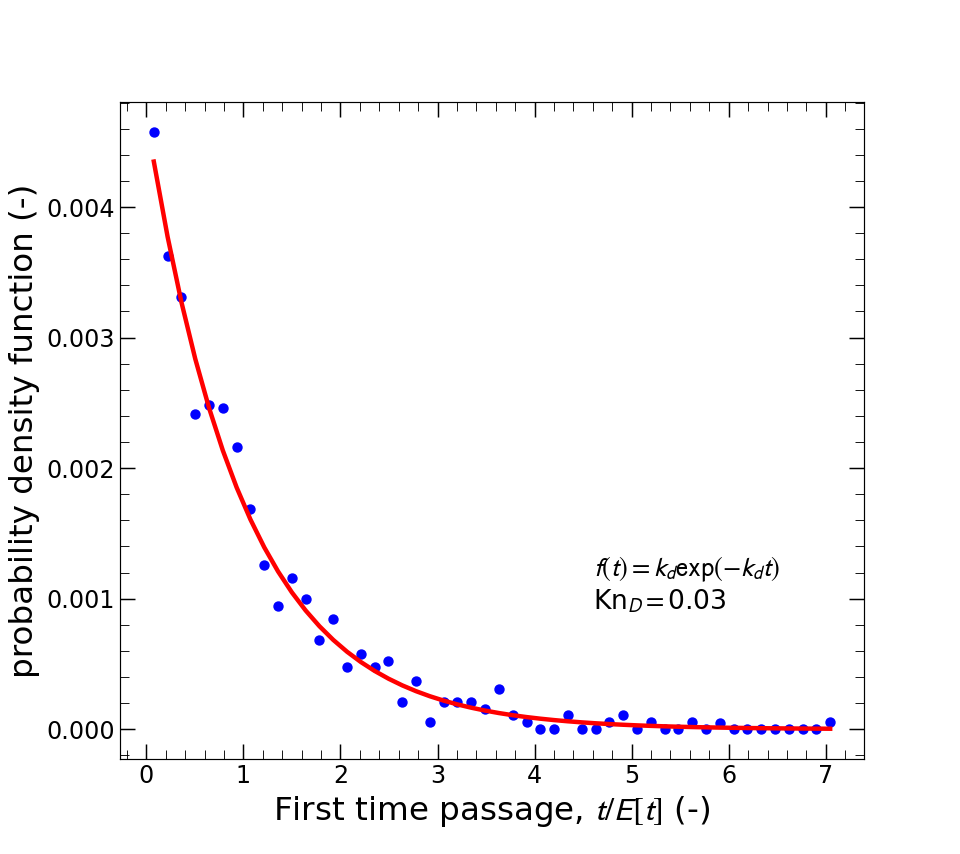

In [13]:
fig, ax = plt.subplots(num=None, figsize=(sizex, sizey), dpi=dpi_fig, facecolor='w', edgecolor='k')

plt.rc('xtick', labelsize=fontsize_legend) 
plt.rc('ytick', labelsize=fontsize_legend)

sel_sim = simulations[simulations["Rc_j"] == Dps[-1]]

ftp_times = sel_sim["ftp_time"].values
V_box = sel_sim["V_box"].values[0]
k = sel_sim["beta_j"].values[0]
KnD = sel_sim["Kn_d_j"].values[0]

Plot_histogram_ftp(fig, ax,ftp_times,V_box,k,KnD,
                   title='pdf_ftp_diffusive',
                   k_text="k_d", legend=False)
Plot_format(fig, ax, legend=False)

plt.xlabel(r"First time passage, $t/E[t]$ (-)", fontsize=fontsize_axis)
plt.ylabel("probability density function (-)", fontsize=fontsize_axis)

#y_min = 250
#y_max = 2250
#x_min = 0
#x_max = 80
#plt.ylim([y_min,y_max])
#plt.xlim([x_min,x_max])
#ax.text(0.05*(x_max-x_min)+x_min,
#        0.9*(y_max-y_min)+y_min,
#                "a",
#             color="k", fontsize=20)
#ax.set_yscale("log");
#ax.set_xscale("log");
plt.savefig('Figures/pdf_ftp_diffusive.png');

<IPython.core.display.Javascript object>


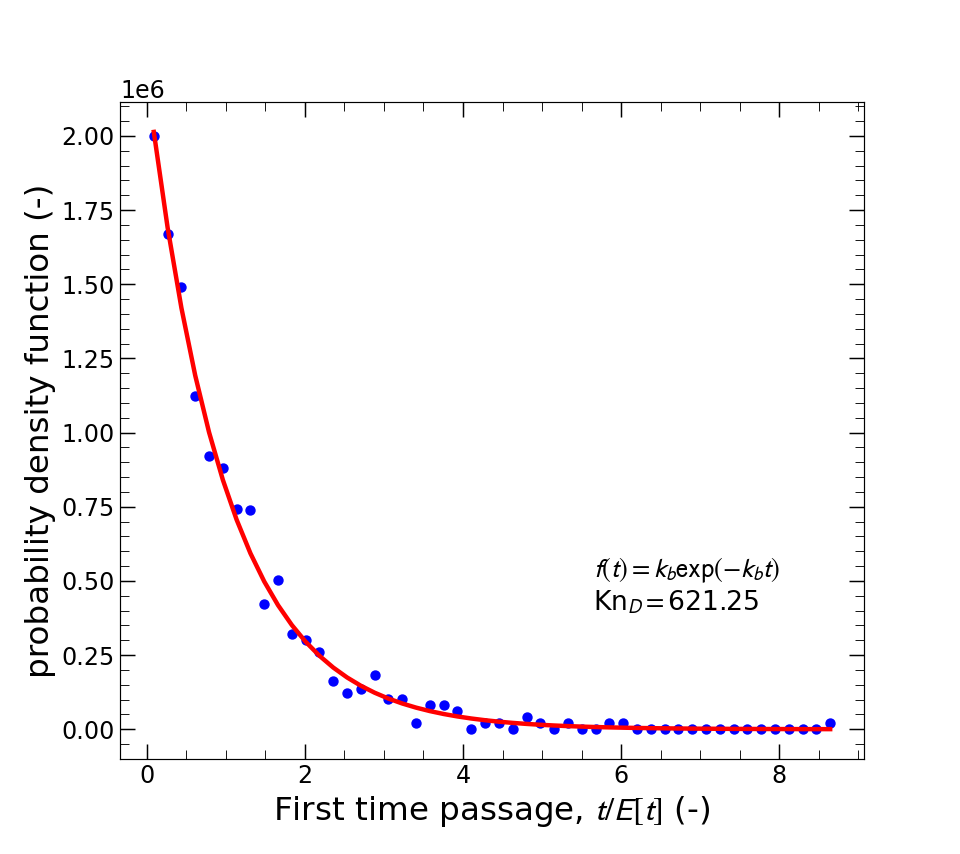

In [14]:
fig, ax = plt.subplots(num=None, figsize=(sizex, sizey), dpi=dpi_fig, facecolor='w', edgecolor='k')

plt.rc('xtick', labelsize=fontsize_legend) 
plt.rc('ytick', labelsize=fontsize_legend)

sel_sim = simulations[simulations["Rc_j"] == Dps[0]]

ftp_times = sel_sim["ftp_time"].values
V_box = sel_sim["V_box"].values[0]
k = sel_sim["beta_j"].values[0]
KnD = sel_sim["Kn_d_j"].values[0]

Plot_histogram_ftp(fig, ax,ftp_times,V_box,k,KnD,
                   title='pdf_ftp_ballistic',
                   k_text="k_b", legend=False)
Plot_format(fig, ax, legend=False)

plt.xlabel(r"First time passage, $t/E[t]$ (-)", fontsize=fontsize_axis)
plt.ylabel("probability density function (-)", fontsize=fontsize_axis)

plt.savefig('Figures/pdf_ftp_ballistic.png');

<IPython.core.display.Javascript object>


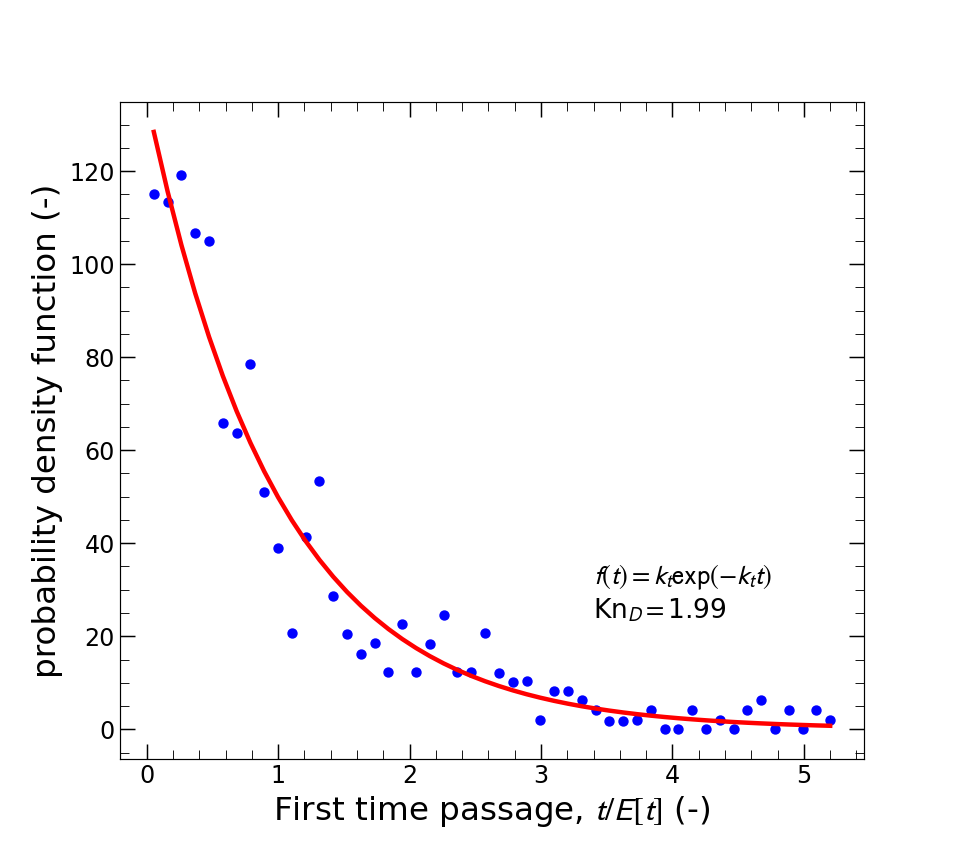

In [15]:
fig, ax = plt.subplots(num=None, figsize=(sizex, sizey), dpi=dpi_fig, facecolor='w', edgecolor='k')

plt.rc('xtick', labelsize=fontsize_legend) 
plt.rc('ytick', labelsize=fontsize_legend)

sel_sim = simulations[simulations["Rc_j"] == Dps[5]]

ftp_times = sel_sim["ftp_time"].values
V_box = sel_sim["V_box"].values[0]
k = sel_sim["beta_j"].values[0]
KnD = sel_sim["Kn_d_j"].values[0]

Plot_histogram_ftp(fig, ax,ftp_times,V_box,k,KnD,
                   title='pdf_ftp_transition',
                   k_text="k_t", legend=False)
Plot_format(fig, ax, legend=False)

plt.xlabel(r"First time passage, $t/E[t]$ (-)", fontsize=fontsize_axis)
plt.ylabel("probability density function (-)", fontsize=fontsize_axis)

plt.savefig('Figures/pdf_ftp_transition.png');